# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 5 Simple Perceptron ##

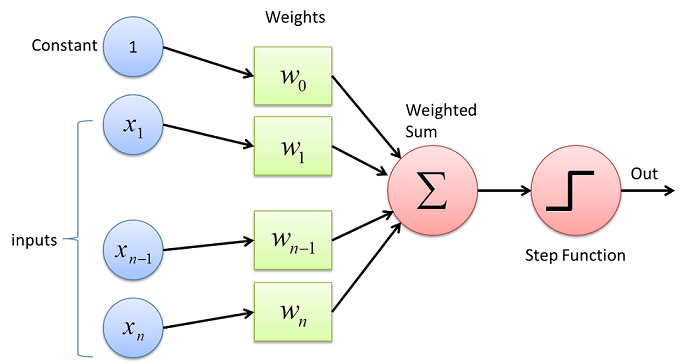


## Before We Begin ##

This lab is for you to understand simple perceptron. In this lab, we are going to learn how to implement perceptron from scratch.

## Mount Google Drive
Download and save a copy of the Lab5 folder, including the Notebook and an excel file (i.e. *sonar.all-data.csv*), to your Google Drive, ensuring that all the files are in the same location.

After that, run the following code.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd "/content/drive/My Drive/lab5"
%ls

/content/drive/My Drive/lab5
'lab4_tasks (1).ipynb'  'lab5_tasks (2).ipynb'   sonar.all-data.csv
 lab5_review.ipynb       lab5_task_solu.ipynb
'lab5_task (1).ipynb'    script.gdoc


## Prepare the dataset

The dataset we will use in this lab is the Sonar dataset.

This dataset describes the information collected from a sonar system. The input variables (those numbers between 0-1) are the strength of the signal from different angles while the prediction variables (the letter __R__ or __M__) indicate the type of object. 

It is a binary classification that requires a perceptron model to differentiate __rocks__ from __metal__.



Run following code to load the dataset.

In [3]:
import pandas as pd
dataset= pd.read_csv('sonar.all-data.csv', index_col=False, header=None)
dataset

0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      51      52      53      54      55      56      57  \
0    0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1    0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2    0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3    0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4    0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
203  0.2684  ...  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065  0.0115   
204  0.2154  ...  0.0061  0.0093  0.0135  0.0063  0.0063  0.0034  0.0032   
205  0.2529  ...  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140  0.0138   
206  0.2354  ...  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034  0.0079   
207  0.2354  ...  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040  0.0036   

         58      59  60  
0    0.0090  0.0032   R  
1    0.0052  0.0044   R  
2    0.0095  0.0078   R  
3    0.0040  0.0117   R  
4    0.0107  0.0094   R  
..      ...     ...  ..  
203  0.0193  0.0157   M  
204  0.0062  0.0067   M  
205  0.0077  0.0031   M  
206  0.0036  0.0048   M  
207  0.0061  0.0115   M  

[208 rows x 61 columns]

As we can see, the data inputs are in __float__ format while labels are in __string__ format. To utilize them to build model, we need to transform labels into numbers. 

The label transformation here is  the LabelEncoder we used in Lab3.

These processes always called __feature extraction__, which means extracting the features we want to care about as numbers to put in the model.

Run following codes to perform the transformation.

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for k in dataset.keys():
  if(type(dataset[k][0])==str):
    dataset[k] = encoder.fit_transform(dataset[k])

Then you can check the numeric data now.
Compare it with the original one to find differences.

In [5]:
dataset

0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      51      52      53      54      55      56      57  \
0    0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1    0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2    0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3    0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4    0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
203  0.2684  ...  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065  0.0115   
204  0.2154  ...  0.0061  0.0093  0.0135  0.0063  0.0063  0.0034  0.0032   
205  0.2529  ...  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140  0.0138   
206  0.2354  ...  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034  0.0079   
207  0.2354  ...  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040  0.0036   

         58      59  60  
0    0.0090  0.0032   1  
1    0.0052  0.0044   1  
2    0.0095  0.0078   1  
3    0.0040  0.0117   1  
4    0.0107  0.0094   1  
..      ...     ...  ..  
203  0.0193  0.0157   0  
204  0.0062  0.0067   0  
205  0.0077  0.0031   0  
206  0.0036  0.0048   0  
207  0.0061  0.0115   0  

[208 rows x 61 columns]

## Task 1: Split the train set and test set (Updated on 21 March)

We need to split the data into the vector representation __X__ that doesn't contain the target goal and the target ground-truth __Y__

Then we need to split the __X & Y__ into train set and test set (follow 75% for training to 25% for testing).

You may check Lab3, if you want to review how to split X_train set, Y_train set, X_test set, and Y_test set.

__Attention__: Applying __random_state__ is important, as it is high likely to have imbalance distribution of data in split sets. You can use __3__ for __random_state__.

In [6]:
from sklearn.model_selection import train_test_split
np_dataset=dataset.to_numpy()

X=np_dataset[:,:-1]
Y=np_dataset[:,-1]


In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25, random_state=3)

## Task 2: Train the perceptron

After preparing the dataset, we now have the "bullet". It is time to build a "gun", a perceptron model.

In this task, we mainly define the training process of the perceptron. To accomplish that, we need to do the following:

1. Set initial weight and bias for perceptron 
2. Predict the label with input variables, weight, and bias
3. Update the weight and bias according to the "distance" between the predicted label and true label
4. Repeat the process of __2__ and __3__ to do the training

Though we can implement perceptron using class as in lecture notes, we will  use functions for this lab for simplicity.

>In following Tasks, you may need the help of NumPy. So, let's have some review on how will NumPy help you do calculation.

In [ ]:
import numpy as np

a=np.array([i for i in range(5)])
b=np.ones(5)
c=np.array([i for i in range(10)]).reshape(2,5)
d=np.array([i for i in range(10)]).reshape(5,2)
print(a)
print(b)
print(c)
print(d)

In [ ]:
# vector elementwise multiply, add, and dot product
print(a+b)
print(a+9)
print(a*b)
print(a*9)
print(np.dot(a,b))

In [ ]:
# vector elementwise math function
print(np.power(a,2))
print(np.sqrt(a))
print(np.log(b))

In [ ]:
# matrix and vector sum 
print(np.sum(a))
print(np.sum(c))
print(np.sum(c, axis=0))
print(np.sum(c, axis=1))

In [ ]:
# vector elementwise checking
print(a>0)
print((a>0)*1)

In [ ]:
# matrix multiplication
print(np.matmul(c,a))
print(np.matmul(c,d))
print(np.matmul(d,c))
print(np.matmul(a,b))

In [ ]:
#difference between .dot & .matmul, these two performs similar for 1d&2d array

x = np.array([i for i in range(18)]).reshape(2,3,3)
#(2,3,3)means a array with two elements, each elements is a 3*3 metrics
y = np.array([i for i in range(18)]).reshape(2,3,3)
#(2,3,3)means a array with two elements, each elements is a 3*3 metrics
z = (np.matmul(x,y))
z_ = np.dot(x,y)
print("x",x)
print("y",y)
print("matmul\n",z,z.shape)
#The matmul() function broadcasts the array like a stack of matrices as elements residing in the last two indexes, respectively.

#matmul will do: [first metrix * first metrix, second metrix * second metrix]. the dimension of metrixes need to be matched.
print("dot\n",z_,z_.shape)
#The numpy.dot() function, on the other hand, performs multiplication as the sum of products over the last axis of the first array and the second-to-last of the second
#dot will do: [
  #[
    #[first row of first metrix * first metrix, first row of first metrix * second metrix],
    #[second row of first metrix * first metrix, second row of first metrix * second metrix],
    #[third row of first metrix * first metrix, third row of first metrix * second metrix]
  #],
  #[
    #[first row of second metrix * first metrix, first row of second metrix * second metrix],
    #[second row of second metrix * first metrix, second row of second metrix * second metrix],
    #[third row of second metrix * first metrix, third row of second metrix * second metrix]
  #]
#]



In [ ]:
# matrix and vector slice
print(a[1:])
print(a[:-1])
print(c[:,1])
print(c[:,-1])
print(c[1,:])
print(c[-1,:])
print(c[:,:-1])
#try more to learn about slicing

## Task 2.1

Initialize the __weights_and_bias__.

__weights_and_bias__ represent all trainable variables, including "weight", “bias”. So that the vector length of __weights_and_bias__ should be exactly same with the vector length of data sample in dataset(as the last column of data is label that not be used in training).

Put all trainable parameters in one variable is useful when we want to pass, manage, update them, especially for parameters that are highly related (bias and weight will be used and updated at the same time).

__Attention__: the way you initialize your __weights_and_bias__ should be consistent with how you utilize it later in __predict__ and __training__ functions. i.e. the arrangement of bias and weight.

In [8]:
import numpy as np
#TODO: initialize the weights and bias as a numpy array. 
#There are different ways to initialize them, i.e. from all 0, all 0.5, all 1. Try to get different result
weights_and_bias=np.zeros(dataset.shape[1])

## Task 2.2 (Updated on 21 March)

Define the prediction function, which takes __X__ and __weights_and_bias__ as input to calculate and return prediction. 

To do so, you should consider how perceptron uses weight and bias to predict the label for inputs.

As the later training process will update the __weights_and_bias__ by looking at each row in the training dataset, and we do not want to use loop when predict labels for all test dataset. 

Please utilize __.dot()/.matmul()__ function to achieve following:

>1. The prediction function can take both matrix(i.e., X_train) and vector(i.e., X_train[0]) as input for __X__. 
>2. The return type of __prediction__ will change according to the type of input __X__ (i.e., single value for vector input and vector type for matrix input).

If the __X__ is a matrix (2D array) while __weights_and_bias__ is a array: 

__X__: 
\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{d1} & x_{d2} & x_{d3} & \dots  & x_{dn} 
\end{bmatrix} 

__weights_and_bias__:
\begin{bmatrix}
    \theta \\
    w_{1}\\      
    w_{2}\\    
    \vdots \\
    w_{n}     
\end{bmatrix}

Then, the calculation of prediction in matrix form will be like:

$$\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\ 
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{d1} & x_{d2} & x_{d3} & \dots  & x_{dn} 
\end{bmatrix}\times
\begin{bmatrix}
    w_{1}\\      
    w_{2}\\    
    \vdots \\
    w_{n}     
\end{bmatrix}+
\begin{bmatrix}
    \theta\\      
    \theta\\    
    \vdots \\
    \theta     
\end{bmatrix}
=\begin{bmatrix}
    Y_{1}\\      
    Y_{2}\\    
    \vdots \\
    Y_{d}     
\end{bmatrix}$$

If If the __X__ is array while __weights_and_bias__ is a array: 

__X__: 
\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
\end{bmatrix} 

__weights_and_bias__:
\begin{bmatrix}
    \theta \\
    w_{1}\\      
    w_{2}\\    
    \vdots \\
    w_{n}     
\end{bmatrix}

Then, the calculation of prediction in vector form will be like:

$$\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
\end{bmatrix} \times
\begin{bmatrix}
    w_{1}\\      
    w_{2}\\    
    \vdots \\
    w_{n}     
\end{bmatrix}+ \theta     
=Y_{1}$$

Try to use NumPy calculation to construct the function. 

__Attention__: __weights_and_bias__ represent all trainable variables, including "weight", “bias”. So that the vector length of __weights_and_bias__ should be exactly same with the vector length of data sample in dataset (as the last column of data is label that not be used in training).

In [9]:

def predict(X, weights_and_bias):
    response=np.dot(X, weights_and_bias[1:])
    response=response+weights_and_bias[0]
    prediction = (response>0)*1
    return prediction

## Task 2.3 (Updated on 21 March)

Define the training function, which will take __weights_and_bias__, __X__, __Y__, __learning_rate__, and __epochs__ as input to get final __weights_and_bias__ for our perceptron.

The __weights_and_bias__ should be updated according to the value of data sample in dataset and difference between prediction and true labels:

1. predict the label with input variables, weight, and bias
2. update the weight and bias according to the "distance" between the predicted label and true label
3. repeat the process of __1__ and __2__ to do the training

Please also use level of error to stop the training:
> Calculating the avg error level for each epoch, stop training if the avg error level is less than 0.1.


In [10]:
def training(weights_and_bias, X,Y, learning_rate, epochs):
    for epoch in range(epochs):
        for i in range(Y.shape[0]):
            errors=Y[i]-predict(X[i], weights_and_bias)
            weights_and_bias[1:] += errors*X[i]*learning_rate
            weights_and_bias[0] +=learning_rate*errors
    return weights_and_bias

Then pass the initialized weights_and_bias and train set into the training functionto to get final_weights_and_bias.

We define the learning_rate and epochs as 0.01 and 500 here. You can also try other combinations to get your result.

Different parameters could produce different outcomes.

In [11]:
final_weights_and_bias=training(weights_and_bias, X_train,Y_train, 0.01, 500)

## Task 3: Prediction and evaluate the performance

Finally, we get the trained weights and bias, which represent the perceptron model. Then we can perform an evaluation on the test set we split to check our hardworking outcome.

What to do:

1. Using __final_weights_and_bias__ to predict the label of the test set

2. Build __accuracy_metric__ to get the accuracy score by comparing predicted and true labels.

In [19]:
prediction=predict(X_test, final_weights_and_bias)


Define the accuracy metric function, which will take the __dataset__ and __prediction__ as input to calculate the accuracy score.

Metric here we use is just simple acc: 

__acc__=(number of matching)/(total number)

In [20]:
def accuracy_metric(prediction,Y_test):
  check= np.equal(prediction,Y_test)
  count= np.sum(check, axis=0)
  return count/ float(Y_test.shape[0]) * 100.0

In [21]:
scores= accuracy_metric(Y_test,prediction)
print(scores)


73.07692307692307


Following is the accuracy metric provided by sklearn. The result of your accuracy_metric should be the same as its.

In [22]:
from sklearn import metrics
print(metrics.accuracy_score(Y_test, prediction))

0.7307692307692307




Let us use another metric to evaluate the performance: __F1__ score.

__F1__ score is a balance score that not only cares about precision but also cares about the recall.

In [23]:
print(metrics.f1_score(Y_test, prediction))

0.6818181818181819


You may think the scores are not so good. 

Try to check the prediction and output to find the reason.

In [24]:
for i in range(len(prediction)):
  print("pred: ",prediction[i]," True: ", Y_test[i])

pred:  0  True:  0.0
pred:  0  True:  0.0
pred:  0  True:  0.0
pred:  0  True:  0.0
pred:  0  True:  0.0
pred:  1  True:  1.0
pred:  1  True:  0.0
pred:  0  True:  0.0
pred:  1  True:  1.0
pred:  1  True:  1.0
pred:  1  True:  1.0
pred:  0  True:  0.0
pred:  0  True:  0.0
pred:  0  True:  0.0
pred:  0  True:  1.0
pred:  1  True:  0.0
pred:  0  True:  0.0
pred:  1  True:  1.0
pred:  0  True:  0.0
pred:  1  True:  0.0
pred:  0  True:  0.0
pred:  1  True:  0.0
pred:  0  True:  1.0
pred:  0  True:  1.0
pred:  1  True:  1.0
pred:  0  True:  0.0
pred:  1  True:  1.0
pred:  0  True:  1.0
pred:  0  True:  1.0
pred:  1  True:  0.0
pred:  1  True:  1.0
pred:  0  True:  1.0
pred:  0  True:  0.0
pred:  0  True:  1.0
pred:  1  True:  1.0
pred:  0  True:  0.0
pred:  1  True:  1.0
pred:  1  True:  1.0
pred:  0  True:  1.0
pred:  0  True:  0.0
pred:  0  True:  0.0
pred:  0  True:  0.0
pred:  1  True:  0.0
pred:  1  True:  1.0
pred:  0  True:  0.0
pred:  0  True:  0.0
pred:  1  True:  1.0
pred:  1  Tru

You can change the initialization of __weights_and_bias__, __learning_rate__, __epochs__.... and run the training process again.

With different parameter setting, you may get different accuracy socre.

As we do not need to submit this lab, I will just using the accuracy score from perceptron model under sklearn as a reference.

In [25]:
from sklearn.linear_model import Perceptron

input=X_train
output=Y_train
weights={0:0.1,1:0.5}
model=Perceptron(class_weight=weights, eta0=0.1)
model.fit(input,output)
prediction2=model.predict(X_test)

In [26]:
print(metrics.accuracy_score(Y_test, prediction2))

0.7307692307692307


In [27]:
for i in range(len(prediction)):
  print("pred: ",prediction[i]," pred2",prediction2[i]," True: ", Y_test[i])

pred:  0  pred2 0.0  True:  0.0
pred:  0  pred2 0.0  True:  0.0
pred:  0  pred2 0.0  True:  0.0
pred:  0  pred2 1.0  True:  0.0
pred:  0  pred2 0.0  True:  0.0
pred:  1  pred2 1.0  True:  1.0
pred:  1  pred2 1.0  True:  0.0
pred:  0  pred2 0.0  True:  0.0
pred:  1  pred2 1.0  True:  1.0
pred:  1  pred2 1.0  True:  1.0
pred:  1  pred2 1.0  True:  1.0
pred:  0  pred2 1.0  True:  0.0
pred:  0  pred2 0.0  True:  0.0
pred:  0  pred2 1.0  True:  0.0
pred:  0  pred2 0.0  True:  1.0
pred:  1  pred2 1.0  True:  0.0
pred:  0  pred2 0.0  True:  0.0
pred:  1  pred2 1.0  True:  1.0
pred:  0  pred2 0.0  True:  0.0
pred:  1  pred2 0.0  True:  0.0
pred:  0  pred2 1.0  True:  0.0
pred:  1  pred2 1.0  True:  0.0
pred:  0  pred2 1.0  True:  1.0
pred:  0  pred2 0.0  True:  1.0
pred:  1  pred2 1.0  True:  1.0
pred:  0  pred2 0.0  True:  0.0
pred:  1  pred2 1.0  True:  1.0
pred:  0  pred2 1.0  True:  1.0
pred:  0  pred2 1.0  True:  1.0
pred:  1  pred2 1.0  True:  0.0
pred:  1  pred2 1.0  True:  1.0
pred:  0

# Unmount Google Drive

In [ ]:
drive.flush_and_unmount()